# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | zaozersk
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | sitka
Processing Record 10 of Set 1 | katsuren-haebaru
Processing Record 11 of Set 1 | atafu village
Processing Record 12 of Set 1 | uray
Processing Record 13 of Set 1 | berezovyy
Processing Record 14 of Set 1 | hasaki
Processing Record 15 of Set 1 | kourou
Processing Record 16 of Set 1 | pimentel
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | yuzhno-kurilsk
Processing Record 19 of Set 1 | reggane
Processing Record 20 of Set 1 | portland
Processing Record 21 of Set 1 | awjilah
Processing Record 22 of Set 1 | bilibino
Processi

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,11.01,94,18,0.89,NZ,1714326510
1,edinburgh of the seven seas,-37.0676,-12.3116,14.52,75,20,14.00,SH,1714326510
2,grytviken,-54.2811,-36.5092,1.95,90,33,3.92,GS,1714326510
3,port-aux-francais,-49.3500,70.2167,4.70,65,48,10.87,TF,1714326510
4,zaozersk,69.4005,32.4476,-4.30,86,34,2.45,RU,1714326510


In [7]:
# Export the City_Data into a csv
from pathlib import Path  
filepath = Path('python-api-challenge/output_data/cities.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)       
city_data_df.to_csv("python-api-challenge/output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("python-api-challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.01,94,18,0.89,NZ,1714326510
1,edinburgh of the seven seas,-37.0676,-12.3116,14.52,75,20,14.00,SH,1714326510
2,grytviken,-54.2811,-36.5092,1.95,90,33,3.92,GS,1714326510
3,port-aux-francais,-49.3500,70.2167,4.70,65,48,10.87,TF,1714326510
4,zaozersk,69.4005,32.4476,-4.30,86,34,2.45,RU,1714326510


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

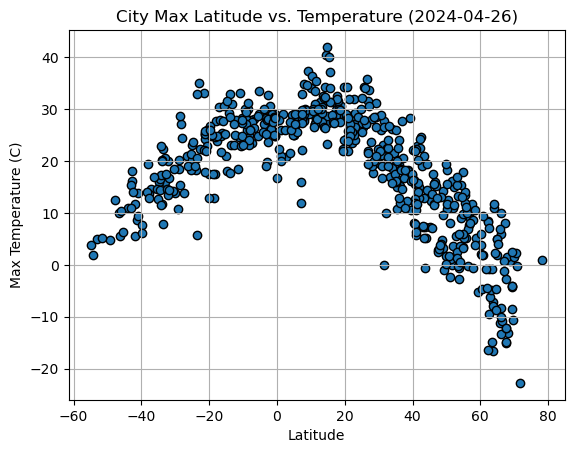

In [9]:
# Build scatter plot for latitude vs. temperature
date = city_data_df['Date'].max()
latitude = city_data_df['Lat']
temp = city_data_df['Max Temp']

x = latitude
y = temp
plt.scatter(x, y, edgecolors='black')
plt.title('City Max Latitude vs. Temperature (2024-04-26)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("python-api-challenge/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

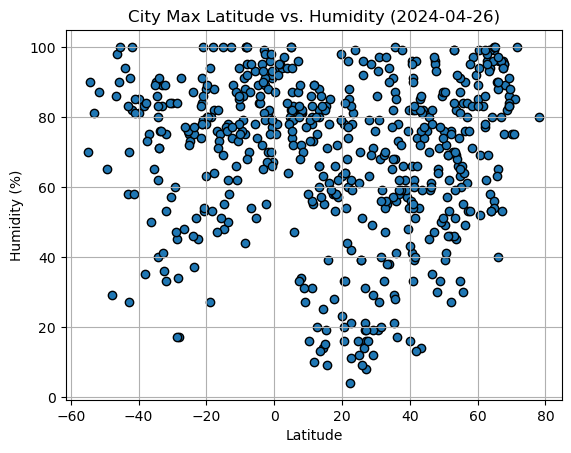

In [10]:
# Build the scatter plots for latitude vs. humidity
date = city_data_df['Date'].max()
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']
x = latitude
y = humidity
plt.scatter(x,y,edgecolors='black')
plt.title('City Max Latitude vs. Humidity (2024-04-26)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("python-api-challenge/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

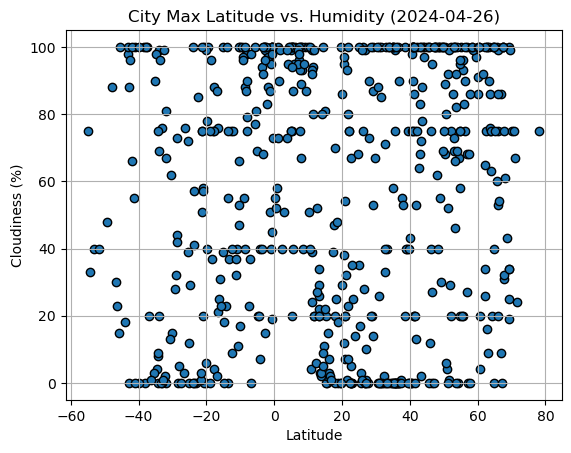

In [11]:
# Build the scatter plots for latitude vs. cloudiness
date = city_data_df['Date'].max()
latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']
x = latitude
y = cloudiness
plt.scatter(x,y,edgecolors='black')
plt.title('City Max Latitude vs. Humidity (2024-04-26)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("python-api-challenge/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

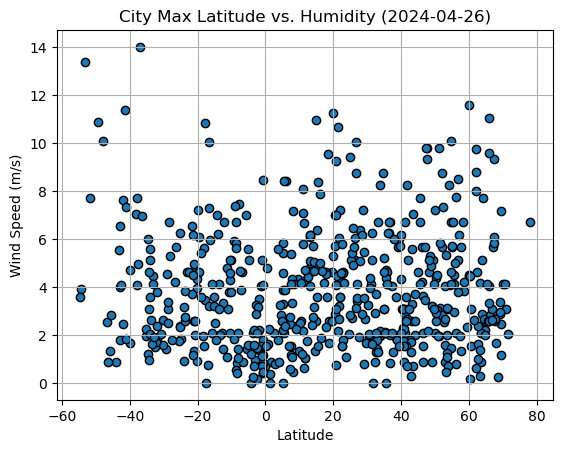

In [12]:
# Build the scatter plots for latitude vs. wind speed
date = city_data_df['Date'].max()
latitude = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']
x = latitude
y = wind_speed
plt.scatter(x,y,edgecolors='black')
plt.title('City Max Latitude vs. Humidity (2024-04-26)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("python-api-challenge/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, marker="o", color="skyblue", edgecolors="black")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=20,color="red")
    plt.xlabel('Latitude')
    print(f"The r-squared is: {rvalue**2}")

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,zaozersk,69.4005,32.4476,-4.30,86,34,2.45,RU,1714326510
5,iqaluit,63.7506,-68.5145,-7.15,58,75,2.06,CA,1714326506
7,bethel,41.3712,-73.4140,22.97,62,20,3.60,US,1714326282
8,sitka,57.0531,-135.3300,8.94,53,0,6.17,US,1714326511
9,katsuren-haebaru,26.3369,127.8719,27.21,92,100,5.14,JP,1714326511


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.01,94,18,0.89,NZ,1714326510
1,edinburgh of the seven seas,-37.0676,-12.3116,14.52,75,20,14.00,SH,1714326510
2,grytviken,-54.2811,-36.5092,1.95,90,33,3.92,GS,1714326510
3,port-aux-francais,-49.3500,70.2167,4.70,65,48,10.87,TF,1714326510
6,new norfolk,-42.7826,147.0587,16.07,70,88,4.00,AU,1714326510


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7347581614142733


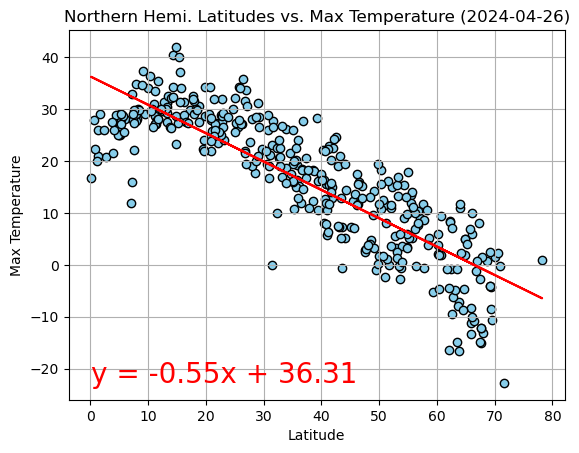

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

linear_regression(x_values, y_values)
plt.title(f"Northern Hemi. Latitudes vs. Max Temperature (2024-04-26)")
plt.ylabel("Max Temperature")
plt.grid()
plt.show()

The r-squared is: 0.6601867252780932


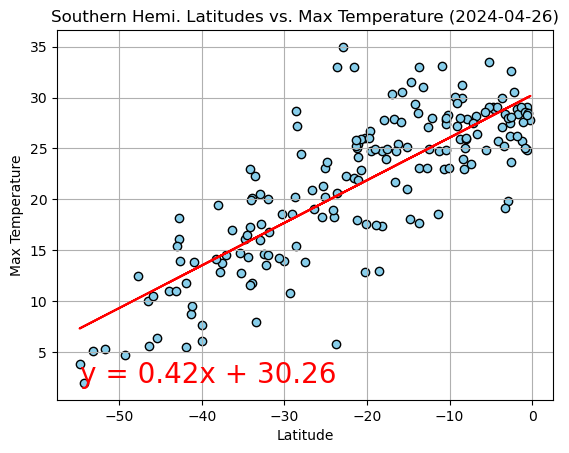

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

linear_regression(x_values, y_values)
plt.title(f"Southern Hemi. Latitudes vs. Max Temperature (2024-04-26)")
plt.ylabel("Max Temperature")
plt.grid()
plt.show()

**Discussion about the linear relationship:** Temperatures are higher in cities located closer to the equator (0) and temperatures are lower in cities located further away from the equator. This trend is observed in both the norther and southern hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.03045947375527042


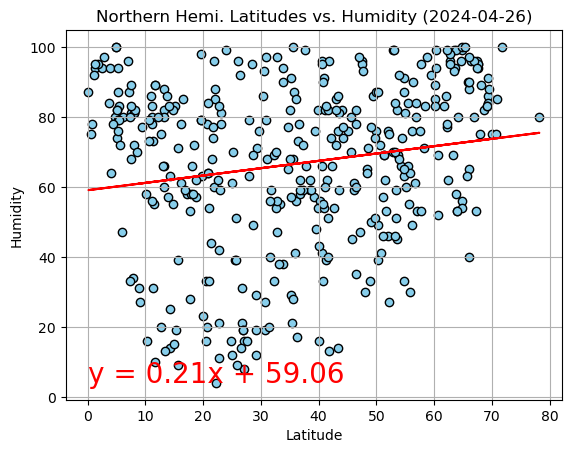

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

linear_regression(x_values, y_values)
plt.title(f"Northern Hemi. Latitudes vs. Humidity (2024-04-26)")
plt.ylabel("Humidity")
plt.grid()
plt.show()

The r-squared is: 0.03082571332955805


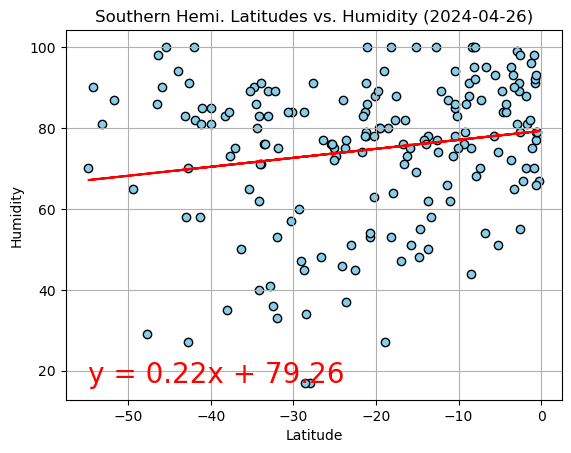

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

linear_regression(x_values, y_values)
plt.title(f"Southern Hemi. Latitudes vs. Humidity (2024-04-26)")
plt.ylabel("Humidity")
plt.grid()
plt.show()

**Discussion about the linear relationship:** Humidity rises the further a city is located from the equator (0) in the northern hemisphere. Humidity lowers the further a city is located from the equator in the souther hemisphere. There is no observable correlation in this trend.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.009169926802166418


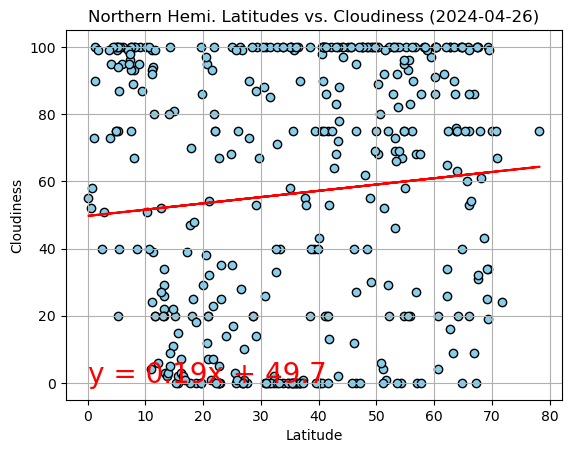

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

linear_regression(x_values, y_values)
plt.title(f"Northern Hemi. Latitudes vs. Cloudiness (2024-04-26)")
plt.ylabel("Cloudiness")
plt.grid()
plt.show()

The r-squared is: 0.05247340403745984


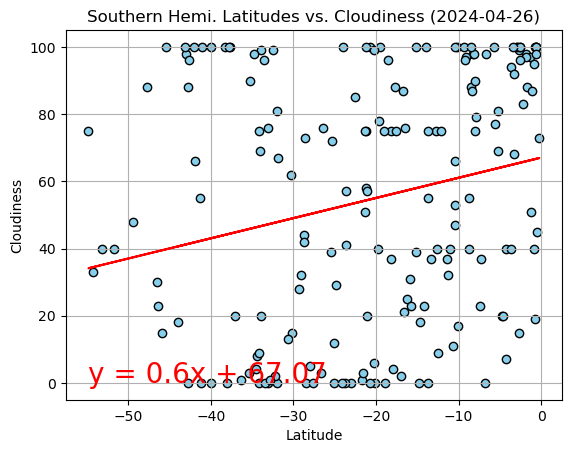

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

linear_regression(x_values, y_values)
plt.title(f"Southern Hemi. Latitudes vs. Cloudiness (2024-04-26)")
plt.ylabel("Cloudiness")
plt.grid()
plt.show()

**Discussion about the linear relationship:** Cloudiness is roughly equal in both the northern and southern hemispheres. A greater number of cities in the northern hemisphere fall along the slope of the line, which causes the perception that the northern hemisphere is cloudier than the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0013669482159284648


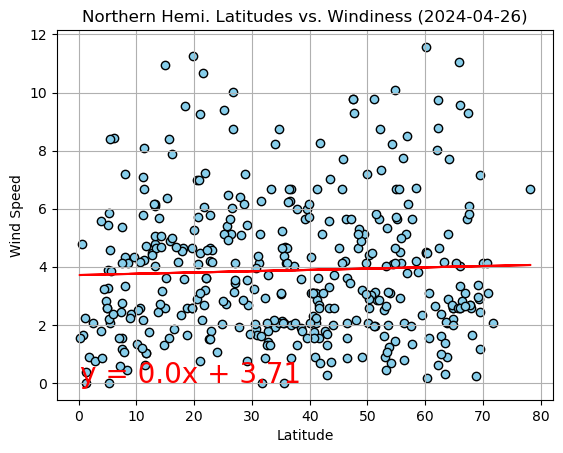

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

linear_regression(x_values, y_values)
plt.title(f"Northern Hemi. Latitudes vs. Windiness (2024-04-26)")
plt.ylabel("Wind Speed")
plt.grid()
plt.show()

The r-squared is: 0.08646101443298274


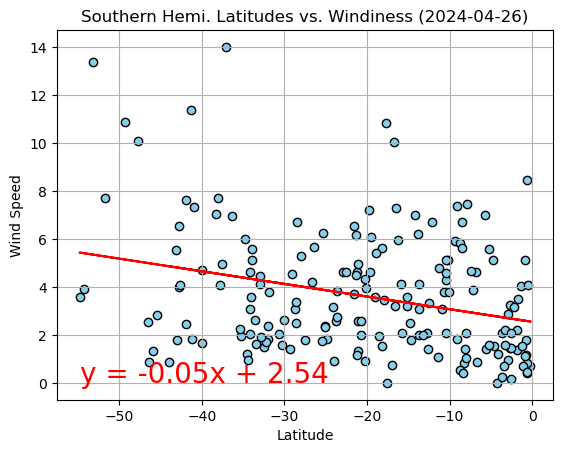

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

linear_regression(x_values, y_values)
plt.title(f"Southern Hemi. Latitudes vs. Windiness (2024-04-26)")
plt.ylabel("Wind Speed")
plt.grid()
plt.show()

**Discussion about the linear relationship:** Windiness is quite consistent in the northern hemisphere. Windiness picked up sharply in cities further away from the equator (0) in the southern hemisphere. 